## 0.0 IMPORTS

## 0.1 Helper functions

In [57]:
import pandas as pd
import numpy as np
import inflection
import math
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

## 0.2 Loading Data

In [13]:
df_sales_raw = pd.read_csv('dataset/train.csv', low_memory=False)
df_store_raw = pd.read_csv('dataset/store.csv', low_memory=False)

In [14]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [17]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
198708,239,2,2015-02-03,4936,454,1,1,0,0,d,c,610.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 DESCRIÇÃO DOS DADOS

In [18]:
# copia de seguranca
df1 = df_raw.copy()

## 1.1 Rename Columns

In [19]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

#renomear tipo snake_case

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map( snakecase, cols_old ))

#rename columns
df1.columns = cols_new

In [21]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions 

In [22]:
print( 'Number of raws: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of raws: 1017209
Number of columns: 18


## 1.3 Data Types

In [23]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [24]:
# data formato DATA
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [25]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

#competition_distance - NA(2642)
Indica que não possui competidor próximo ou ele está muito afastado!!

In [26]:
#distância máxima 
df1['competition_distance'].max()

75860.0

In [27]:
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

In [28]:
df1['competition_distance'].isna().sum()

0

competition_open_since_month    323348 <br>
Mes e ano que o concorrente mais próximo foi aberto<br>
Razões de colunas vazias:<br>
1) Não possui concorrente próximo <br>
2) Ou o concrrente abriu muito antes dos dados serem coletados ou esqueceram de anotar a data <br>
Solução: supor a data de abertura como sendo a data da venda, ou seja, competidor acabou de chgar e ainda não consegue influenciar nas vendas.

In [29]:
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) 
                                                                           else x['competition_open_since_month'], axis=1 )

#competition_open_since_year     323348

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) 
                                                                           else x['competition_open_since_year'], axis=1 )

pomo2 - extensão de uma promocão já existente
solução igual a anterior - substituir pela data da venda

In [30]:
#promo2_since_week 508031
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) 
                                                                           else x['promo2_since_week'], axis=1 )

#promo2_since_year 508031

df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) 
                                                                           else x['promo2_since_year'], axis=1 )

In [31]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
403380,686,7,2014-07-06,0,0,0,0,0,0,a,a,20050.0,4.0,2002.0,0,27.0,2014.0,NaN


In [32]:
month_map = {1: 'Jan', 2: 'Fev', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
df1['promo_interval'].fillna( 0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map ) 

In [33]:
df1.sample(5).T

,859441,645760,503203,568975,751683
store,562,961,9,1111,959
day_of_week,3,6,7,5,2
date,2013-05-22 00:00:00,2013-11-30 00:00:00,2014-04-06 00:00:00,2014-02-07 00:00:00,2013-08-27 00:00:00
sales,17244,8382,0,5506,7687
customers,3077,786,0,431,847
open,1,1,0,1,1
promo,0,0,0,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,b,d,a,a,a


In [34]:
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval']==0 
                                            else 1 if x['month_map'] in x['promo_interval'].split( ',' ) 
                                            else 0, axis=1 )

In [35]:
df1.sample(5).T

,607979,568157,807012,697299,900415
store,1090,293,538,95,281
day_of_week,5,5,1,1,1
date,2014-01-03 00:00:00,2014-02-07 00:00:00,2013-07-08 00:00:00,2013-10-14 00:00:00,2013-04-15 00:00:00
sales,5119,6062,3709,6459,3377
customers,721,833,606,822,419
open,1,1,1,1,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,1,1,1,0,0
store_type,a,c,a,a,d


In [36]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change types

In [37]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [38]:
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )

In [39]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [40]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

In [41]:
# selicionar as variaveis numericas
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


In [42]:
# selcionar as variáveis categóricas
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64'] )
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


## 1.7.1 Numerical Attributes

In [43]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concatenate
metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

In [44]:
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis'] 
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

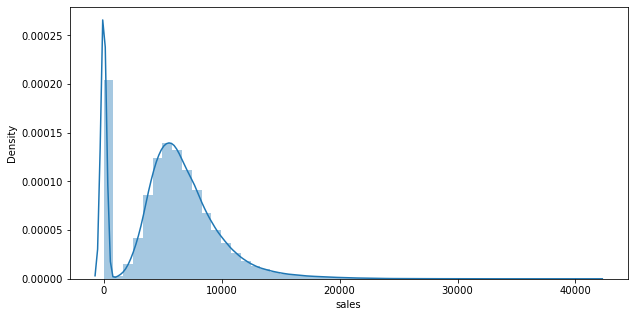

In [45]:
plt.figure( figsize=(10,5) )
sns.distplot( df1['sales'] )

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

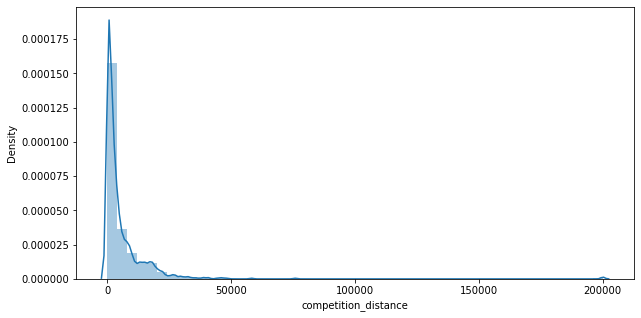

In [46]:
plt.figure( figsize=(10,5) )
sns.distplot( df1['competition_distance'] )

## 1.7.2 Categorical Attibutes 

In [47]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

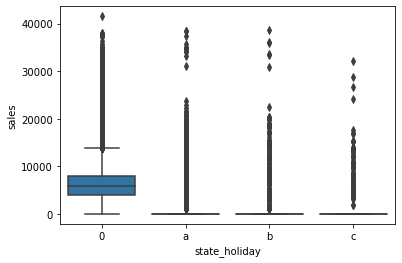

In [48]:
sns.boxplot( x='state_holiday', y='sales', data=df1 )

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

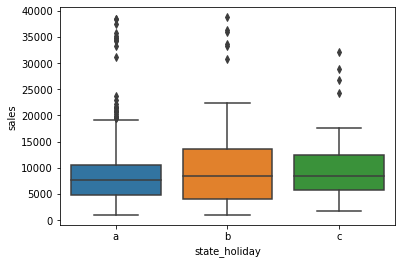

In [49]:
# excluir os dias que não tiveram vendas/loja fechada 
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

Organizar boxplot, visualizar como as vendas então distribuídas pelas variáveis categóricas.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

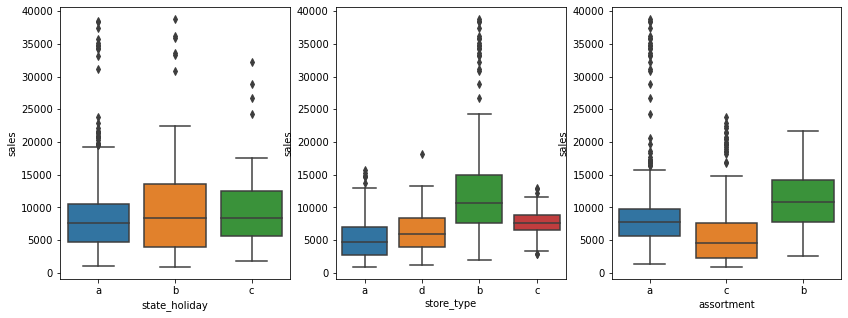

In [50]:
plt.figure( figsize=(14,5) )
plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux1 )
plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux1 )
plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux1 )

## 2.0 FEATURE ENGINEERING

In [51]:
df2 = df1.copy()

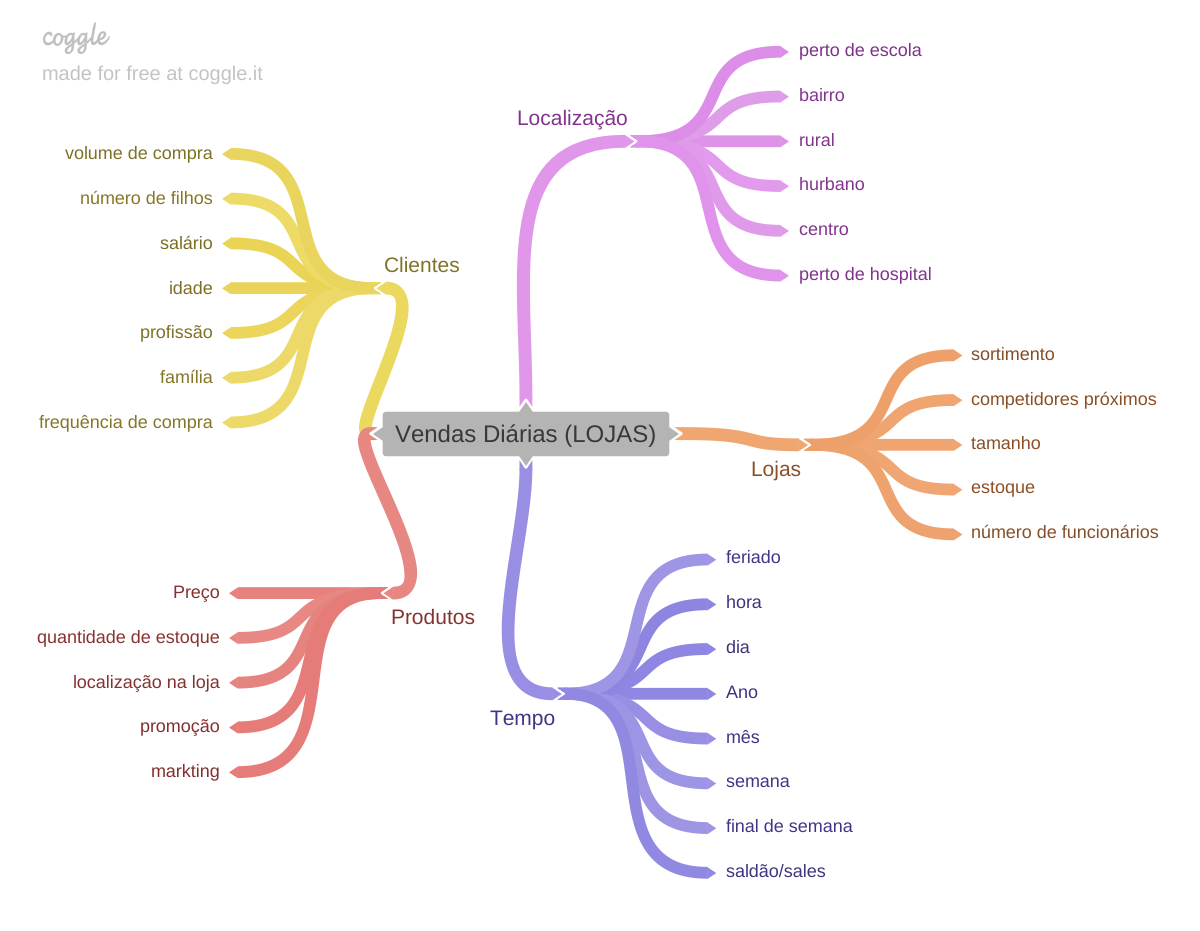

In [52]:
Image( 'img/MindMapHypotesis.png' )

## 2.1 Criação das Hipóteses

### 2.1.1 As hipóteses das lojas

**1.** Lojas com maior quadro de funcionárias deveriam vender mais

**2.** Lojas com maior estoque deveriam vender mais

**3.** Lojas com maior porte(tamanho) deveriam vender mais

**4.** Lojas com maior sortimento deveriam vender mais

**5.** Lojas com competidores mais próximos deveriam vender menos

**6.** Lojas com competidores à mais tempo ddeveriam vender mais

### 2.1.2 As hipóteses do produto

**1.** Lojas que investem mais em markting deveriam vender mais

**2.** Lojas que expõe mais produtos em vitrines deveriam vender mais

**3.** Lojas com preço menor de produtos deveriam vender mais

**4.** Lojas com promocões mais agressivas deveriam vender mais

**5.** Lojas com promocões ativas por mais tempo deveriam vender mais

**6.** Lojas com mais dias de promoção deveriam vender mais

**7.** Lojas com mais promoções consecutivas deveriam vender mais

### 2.1.3 As hipóteses do Tempo - Temporal

**1.** Lojas abertas no feriado de Natal deveriam vender mais

**2.** Lojas deveriam vender mais ao longo dos anos

**3.** Lojas deveriam vender mais no segundo semestre do ano

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês

**5.** Lojas deveriam vender menos aos finais de semana

**6.** Lojas deveriam vender menos durante os feriados escolares

## 2.2 Lista Final de Hipóteses

Começar com as hipótese que possuem dados disponíveis para validação

**1.** Lojas com maior sortimento deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores à mais tempo ddeveriam vender mais

**4.** Lojas com promocões ativas por mais tempo deveriam vender mais

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas no feriado de Natal deveriam vender mais

**8.** Lojas deveriam vender mais ao longo dos anos

**9.** Lojas deveriam vender mais no segundo semestre do ano

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês

**11.** Lojas deveriam vender menos aos finais de semana

**12.** Lojas deveriam vender menos durante os feriados escolares

## 2.3 Feature Engineering

2.3.1 Derivar ano, mês, semana, semana do ano, dia, year week variável date

In [54]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#week
df2['week'] = df2['date'].dt.week

#week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#day
df2['day'] = df2['date'].dt.day

#year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')

<ipython-input-54-cf8c83377d02>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week'] = df2['date'].dt.week
<ipython-input-54-cf8c83377d02>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [55]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


2.3.2 Criar a variável competition_time_month que será o tempo de concorrrência em mês. Juntar para data competition o mês (competition_since_month) e ano (competition_since_year) da competition e extrair a data da venda (date)

In [58]:
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )

In [59]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [61]:
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days).astype( int )

In [62]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


Criar a variável promo_time_week que será o tempo de promoção em semanas. Juntar para data promo2_since o ano (promo2_since_year) e semana (promo2_since_year) e extrair a data da venda (date)

In [65]:
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'].head()

0    2015-31
1    2010-13
2    2011-14
3    2015-31
4    2015-31
Name: promo_since, dtype: object

In [69]:
#reescrever promo_since como data
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days =7 ))
df2['promo_since'].head()

0   2015-07-27
1   2010-03-22
2   2011-03-28
3   2015-07-27
4   2015-07-27
Name: promo_since, dtype: datetime64[ns]

In [71]:
#criar variável promo_time_week - tempo que a promoção está ativa em semanas
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days).astype( int )
df2['promo_time_week'].head()

0      0
1    279
2    226
3      0
4      0
Name: promo_time_week, dtype: int64

2.3.4 Renomear o assortment: a = basic, b = extra, c = extended

In [74]:
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extended' )
df2['assortment'].head()

0    extended
1    extended
2    extended
3    extended
4    extended
Name: assortment, dtype: object

2.3.4 Renomear o state_holiday: a = public_holiday, b = easter_holiday, c = christmas

In [76]:
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_hooliday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )
df2['state_holiday'].head()

0    regular_day
1    regular_day
2    regular_day
3    regular_day
4    regular_day
Name: state_holiday, dtype: object